## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset
df =  pd.read_csv("ab_data.csv")

#show the first 5 rows
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Check if there is missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
#number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [6]:
df["converted"].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [7]:
# Converted
len(df[df["converted"] == 1])/len(df["converted"])

0.11965919355605512

In [8]:
# Not Converted
len(df[df["converted"] == 0])/len(df["converted"])

0.8803408064439449

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
len(df.query('landing_page == "new_page" & group != "treatment"')) + len(df.query('landing_page != "new_page" & group == "treatment"'))

3893

f. Do any of the rows have missing values?

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.drop(df[((df['group']=='treatment') & (df['landing_page'] !='new_page')) | ((df['group']=='control') & (df['landing_page'] !='old_page'))].index)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
df2 = df.drop(df[((df['group']=='treatment') & (df['landing_page'] !='new_page')) | ((df['group'] !='treatment') & (df['landing_page'] =='new_page')) | ((df['group']=='control') & (df['landing_page'] !='old_page')) | ((df['group'] !='control') & (df['landing_page'] =='old_page'))].index)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.nunique()["user_id"]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2['user_id'].duplicated(keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop(labels=1899 , inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.converted.value_counts()

0    255831
1     34753
Name: converted, dtype: int64

In [22]:
df2.converted.value_counts()[1]/len(df2.converted)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.groupby(["group", "converted"]).size()

group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
dtype: int64

In [24]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [25]:
df2.groupby(["group", "converted"]).size()["control"][1] / df2.group.value_counts()["control"]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
df2.groupby(["group", "converted"]).size()["treatment"][1] / df2.group.value_counts()["treatment"]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [27]:
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The answer**
- The control group has a slightly higher conversion than the treatment group . 
- The control group  percentage is 12.03 % and treatment group percentage is 11.88 % .
- It is not robust evidence that the new treatment page leads to more conversions.

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [29]:
df2["group"].value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [30]:
df2["landing_page"].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [31]:
df2["converted"].value_counts()

0    255831
1     34753
Name: converted, dtype: int64

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The answer**
- $\alpha$ = 0.05
- Null Hypotheses ( $H_{0}$ ) : the conversion rate of the old_page is greater or the same than the conversion rate of the new_page ($p_{new}$ <= $p_{old}$)    
***so, thus  ($p_{new}$ - $p_{old}$) <= 0***   
***if p-value is greater than $\alpha$  (p-value > $\alpha$) then we fail to reject null value***
- Alternative Hypotheses ( $H_{1}$ ) : the conversion rate of the old_page is less than the conversion rate of the new_page ($p_{new}$ > $p_{old}$)    
***so, thus  ($p_{new}$ - $p_{old}$) > 0***  
***if p-value is equal to or less than $\alpha$  (p-value <= $\alpha$) then we reject null value***

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [32]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

In [33]:
sum(df2.query('landing_page == "new_page" & converted == 1')["converted"])/len(df2)

0.05941139223081794

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [34]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

In [35]:
sum(df2.query('landing_page == "old_page" & converted == 1')["converted"])/len(df2)

0.06018569501417834

c. What is $n_{new}$?

In [36]:
# the number of individuals who use new_page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$?

In [37]:
# the number of individuals who use old_page
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
#new_page_converted = np.random.choice([0,1] , size = n_new , p= [1-p_new , p_new] )
new_page_converted = np.random.binomial(1 , size = n_new , p= p_new).mean()

In [39]:
new_page_converted

0.12044594315601129

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
old_page_converted = np.random.binomial(1 , size = n_old , p= p_old).mean()

In [41]:
old_page_converted

0.12010407918829247

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [42]:
diffs = new_page_converted - old_page_converted
diffs

0.00034186396771881955

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [43]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1 , size = n_new , p= p_new).mean()
    old_page_converted = np.random.binomial(1 , size = n_old , p= p_old).mean()
    diffs = new_page_converted - old_page_converted
    p_diffs.append(diffs)
    
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

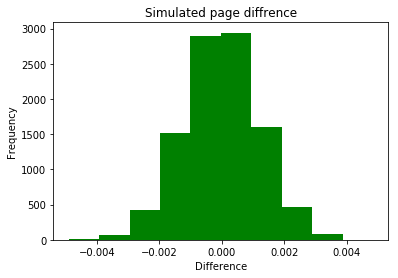

In [44]:

plt.hist(p_diffs, color = "green")
plt.title("Simulated page diffrence")
plt.xlabel('Difference')
plt.ylabel('Frequency');

In [45]:
np.std(p_diffs)

0.0012046409719090139

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
real_control_converted = df2.query('group == "control"')["converted"].mean()
real_control_converted

0.1203863045004612

In [47]:
real_treatment_converted = df2.query('group == "treatment"')["converted"].mean()
real_treatment_converted

0.11880806551510564

In [48]:
r_diffs = real_treatment_converted - real_control_converted
r_diffs

-0.0015782389853555567

In [49]:
# The proportion of the p_diffs are greater than the actual difference observed 
p_diffs = np.array(p_diffs)

print("The P-value is ",(p_diffs > r_diffs).mean())

The P-value is  0.9041


In [50]:
# standard deviation of p_diffs
np.std(p_diffs)

0.0012046409719090139

In [51]:
# Z-sscore of p-value(0.9025)
(r_diffs - 0)/np.std(p_diffs)

-1.310132248660359

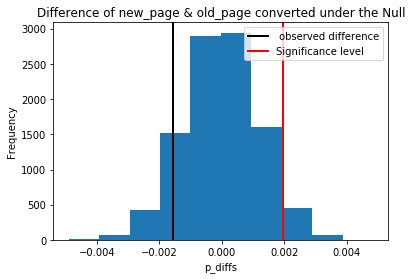

In [52]:
plt.hist(p_diffs)
plt.axvline(x=r_diffs , color = 'black' , linewidth=2 , label=" observed difference")
plt.axvline(x=np.percentile(p_diffs,95) , color = 'r' , linewidth=2 , label="Significance level")

plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Difference of new_page & old_page converted under the Null');
plt.legend()
plt.show()


In [53]:
# confedence interval
lower , upper = np.percentile(p_diffs,0),np.percentile(p_diffs,95)
lower , upper

(-0.004909228041835315, 0.0019731267457684964)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The answer** 
- I computed the actual difference versus observed difference in means of converted old page and converted new page.
- 90.25 % is the proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv. In scientific studies this value is also called p-value which it is higher than significance level ( $\alpha$ = 0.05 )
- As a result, We would fail to reject the Null hypothesis and keep the old page as the value above represents the p-value of observing the statistic given the Null is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [54]:
import statsmodels.api as sm

convert_old =  len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1')) 
n_old = len(df2.query('landing_page == "old_page"'))
n_new = n_new = len(df2.query('landing_page == "new_page"'))
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [55]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new] , alternative =  'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [56]:
# The critical value at 95% confidence interval for one-sided test
from scipy.stats import norm
norm.ppf(1-(0.05))

1.6448536269514722

**The Conclusion**

- The z-score of significance level is 1.6448536269514722 which our z-score (1.3109241984234394) of p-value (0.9050583127590245) must be equal or higher than this value to reject null hypothesis.
- Also we can say that, p value (0.9050583127590245) is higher than significance level (  α  = 0.05 ) thus, we failed to reject the Null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The answer**
- In our case I will use a logistic regression since the dependent variable is converted or not converted (binary variable).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
# create intercept column


df2['intercept']=1
# create dummy variables from the group column 

df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [58]:
df2 = df2.rename(columns={'treatment': 'ab_page'})

# There is no need to control column 
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [59]:
log_reg = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
res = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [60]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        17:36:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [73]:
np.exp(-1.9888),np.exp(-0.0150)

(0.13685955841614492, 0.9851119396030626)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The answer**
- P-value : 0.190
- It differ since It has been performed a one-sided in AB- test part while regression part has been performed a two-sided .
- Coefficients explanation :
    - The intercept means that if the group individual is a"control", we predict its conversion rate to be 0.136 and "ab-page" is predicted to be 0.985 higher than a"control" .
    - Or converted is 0.985 as likely on ab-page than a "Control" holding all else constant


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The answer**
- Disadvantages to adding additional terms into your regression model is that the model gets more complex.
- Considering other factors is a good idea as these factors may leads to more accurate results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [61]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [62]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [63]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [64]:
### Create the necessary dummy variables
df_new[['US','UK','CA']]= pd.get_dummies(df_new['country'])

# There is no need to country column 
df_new = df_new.drop('country',axis = 1)
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [65]:
lg_co = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','UK']])
re_co = lg_co.fit()
re_co.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        17:36:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [71]:
np.exp(-1.9893),np.exp(-0.0149),np.exp(-0.0408),np.exp(0.0099)

(0.13679114574153073,
 0.9852104557227469,
 0.9600211149716509,
 1.0099491671175422)

- Smaller p-value suggests these variables are statistically significant in relating to the response variable . Thus, "UK" is not statistically significant as its p-value is 0.457 .
- Coefficients explanation :
    - The intercept means that if the group individual is a"control" from CA, we predict its conversion rate to be 0.136 
    - "ab-page" is predicted to be 0.985 times than a"control" from CA with holding all other variable constant or Converted is 0.985 times as likely on ab-page than a "Control"from CA with holding all other variable constant
    - "US" is predicted to be 0.96 times than a"control" from CA with holding all other variable constant or Converted is 0.96 times as likely on ab-page than a "Control"from CA with holding all other variable constant
    - "UK" is predicted to be 1.009 times than a"control" from CA with holding all other variable constant or Converted is 1.009 times as likely on ab-page than a "Control"from CA with holding all other variable constant 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
#df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

In [67]:
### Fit Your Linear Model And Obtain the Results
lg_co2 = sm.Logit(df_new['converted'], df_new[['intercept', 'US_ab_page', 'UK_ab_page','US','UK','ab_page']])
res3 = lg_co2.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        17:37:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
US_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

In [74]:
np.exp(-0.0469),np.exp(0.0314),np.exp(-0.0175),np.exp(-0.0057),np.exp(-0.0206)

(0.9541828111007262,
 1.0318981806179213,
 0.9826522356650732,
 0.9943162141784332,
 0.9796107305032505)

- Smaller p-value suggests these variables are statistically significant in relating to the response variable . Thus, "UK" with p-value equals 0.760 and "US" with p-value equals 0.642 are not statistically significant .
- Coefficients explanation :
    - US_ab_page : the converted is 1.03 times as likely on ab-page than converted "Control"from CA(0.954) is dependent to these individuals number from US with holding all other variable constant
    - UK_ab_page : the converted is 0.982 times as likely on ab-page than converted "Control"from CA(0.954) is dependent to these individuals number from UK with holding all other variable constant

## Conclusions

###  Based on the AB-test and logistic regression model :
- We fail to reject the null hypothesis .
- the new page does not convert more than the old page.
